# cleaning the Transaction dataset

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the Transaction dataset from the data file
transactions = pd.read_excel('KPMG_data.xlsx', sheet_name=1)
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [3]:
#Check and deal with missing values
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [4]:
# Check datatype of each column
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

#### Resolving the missing values

In [5]:
# Starting with online_order column
# leave the missing value, if dropped it will be a big lose
#change the datatype to int but the NaN is not an int so assume it as 3
transactions['online_order'].replace(np.nan, 3, inplace=True)
transactions['online_order'] = transactions['online_order'].astype(np.int8)
transactions['online_order'].dtype

dtype('int8')

In [6]:
# The missing values in other columns, the has the same number of missing values so let's check if they are all same rows
transactions.dropna(subset=['brand'], inplace=True)
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  int8          
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

##### The assumpsion was correct so the missing values resolved
##### All the data types are correct so problem solved

In [7]:
line_plot_transactions = transactions['transaction_date'].value_counts().sort_index().to_frame()
line_plot_transactions.rename(columns={'transaction_date':'total_day'})

,total_day
2017-01-01,55
2017-01-02,46
2017-01-03,56
2017-01-04,57
2017-01-05,64
...,...
2017-12-26,54
2017-12-27,52
2017-12-28,55
2017-12-29,53


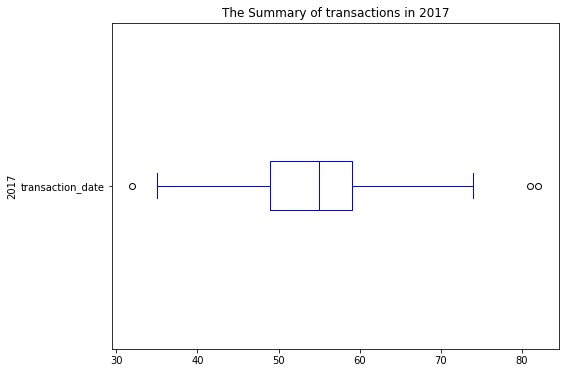

In [8]:
line_plot_transactions.plot(kind='box', figsize=(8, 6), color='blue', vert=False)

plt.title('The Summary of transactions in 2017')
plt.ylabel('2017')

plt.show()

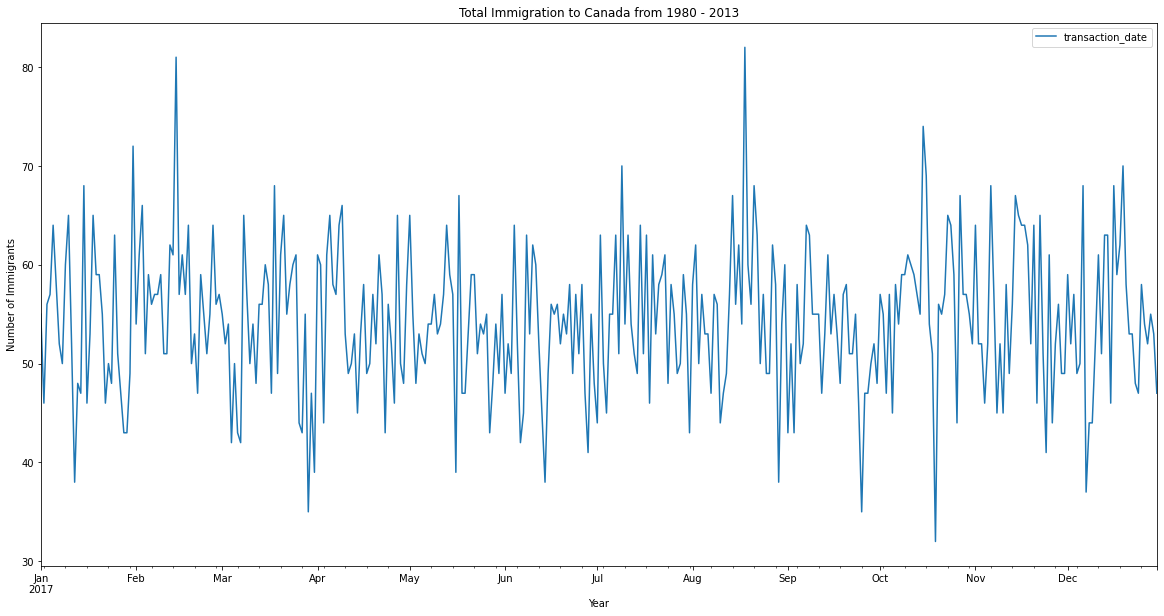

In [10]:
line_plot_transactions.plot(figsize=(20,10))

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [11]:
transactions['online_order'].value_counts()

1    9739
0    9706
3     358
Name: online_order, dtype: int64

In [12]:
transactions['order_status'].value_counts()

Approved     19625
Cancelled      178
Name: order_status, dtype: int64

In [13]:
pie_brand = transactions['brand'].value_counts()
pie_brand

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

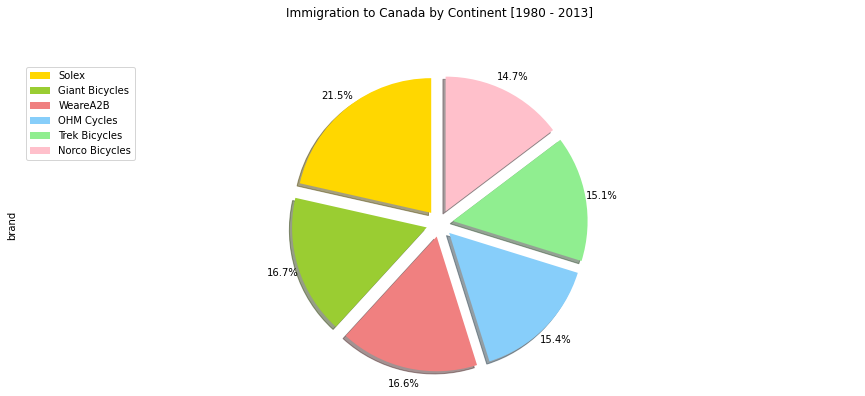

In [14]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

pie_brand.plot(kind='pie',
                            
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=pie_brand.index, loc='upper left') 

plt.show()

In [15]:
transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [16]:
transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [17]:
transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

Text(0.5, 1.0, 'total first sold per year')

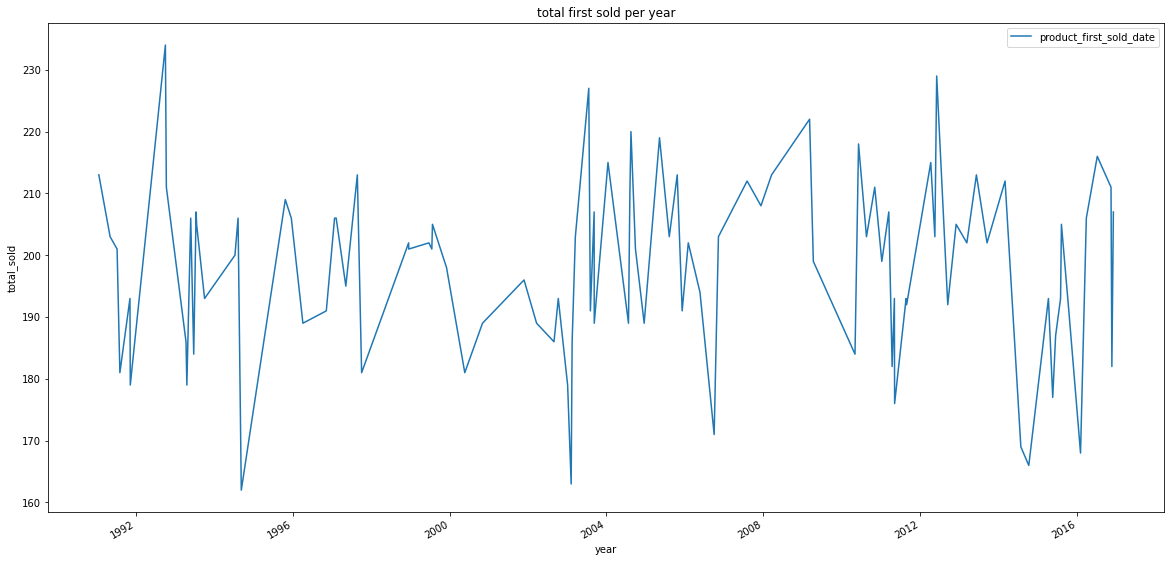

In [21]:
date_first_sold = transactions['product_first_sold_date'].value_counts().sort_index().to_frame()
date_first_sold.plot(figsize=(20,10))

plt.xlabel('year')
plt.ylabel('total_sold')
plt.title('total first sold per year')

In [ ]:
transactions.to_csv('transactionsclean.csv', index=False)